In [1]:
#part 1: climate analysis and exploration

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
#Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#create engine to hawaii.sqlite
engine = create_engine(f"sqlite:///hawaii.sqlite")
conn = engine.connect()

In [6]:
#reflect an existing database into a new model
Base = automap_base()

#reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
#view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
#save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
#create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#exploratory precipitation analysis

In [11]:
#find the most recent date in the data set
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [12]:
#perform a query to retrieve the previous 12 months of precipitation data
#select only the date and prcp values
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
results


[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
data_and_scores = [{"Date": result[0], "PRCP": result[1]} for result in results]
data_and_scores

[{'Date': '2016-08-24', 'PRCP': 0.08},
 {'Date': '2016-08-24', 'PRCP': 2.15},
 {'Date': '2016-08-24', 'PRCP': 2.28},
 {'Date': '2016-08-24', 'PRCP': None},
 {'Date': '2016-08-24', 'PRCP': 1.22},
 {'Date': '2016-08-24', 'PRCP': 2.15},
 {'Date': '2016-08-24', 'PRCP': 1.45},
 {'Date': '2016-08-25', 'PRCP': 0.08},
 {'Date': '2016-08-25', 'PRCP': 0.08},
 {'Date': '2016-08-25', 'PRCP': 0.0},
 {'Date': '2016-08-25', 'PRCP': 0.0},
 {'Date': '2016-08-25', 'PRCP': 0.21},
 {'Date': '2016-08-25', 'PRCP': 0.06},
 {'Date': '2016-08-25', 'PRCP': 0.11},
 {'Date': '2016-08-26', 'PRCP': 0.0},
 {'Date': '2016-08-26', 'PRCP': 0.03},
 {'Date': '2016-08-26', 'PRCP': 0.02},
 {'Date': '2016-08-26', 'PRCP': 0.04},
 {'Date': '2016-08-26', 'PRCP': 0.0},
 {'Date': '2016-08-26', 'PRCP': 0.01},
 {'Date': '2016-08-27', 'PRCP': 0.0},
 {'Date': '2016-08-27', 'PRCP': 0.18},
 {'Date': '2016-08-27', 'PRCP': 0.02},
 {'Date': '2016-08-27', 'PRCP': 0.0},
 {'Date': '2016-08-27', 'PRCP': 0.12},
 {'Date': '2016-08-27', 'PRCP':

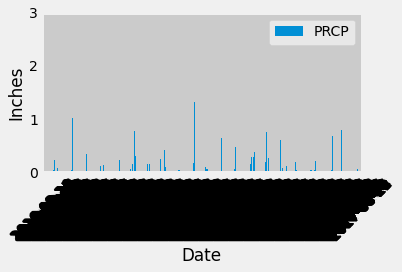

In [14]:
#save the query results as a Pandas DF and set the index to the date column
#sort the dataframe by date
#use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(data_and_scores).set_index("Date").sort_index()
df.plot.bar(ylabel= 'Inches', xlabel = 'Date')
plt.xticks(rotation = 45)
plt.ylim(0, 3)
plt.tight_layout()
plt.show()

In [15]:
#use Pandas to calculate the summary statistics for the precipitation data
df.agg(['mean', 'median', 'var', 'std', 'sem'])

,PRCP
mean,0.176462
median,0.020000
var,0.211865
std,0.460288
sem,0.010254


In [16]:
#exploratory station analysis

In [17]:
#design a query to calculate teh total number stations in the dataset
total_stations = session.query(func.count(Measurement.station)).all()
total_stations

[(19550,)]

In [18]:
#design a query to find the most active stations (stations with the most rows)
#list stations and observation counts in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(active_stations)



[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [19]:
#using the most active station id, calculate the lowest, highest, and average temperatures
calculations = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(calculations)


[(54.0, 85.0, 71.66378066378067)]


<AxesSubplot:ylabel='Frequency'>

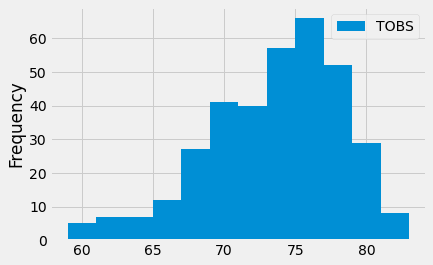

In [20]:
#design a query to retrieve the previous 12 months of temperature observation data
#filter by the station with the highest number of observations
previous_temperature_observations = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').all()

#plot the results as a histogram with bins=12
histogramdf = pd.DataFrame(previous_temperature_observations, columns=['TOBS'])
histogramdf.plot.hist(bins=12)


In [21]:
#close out your session
session.close()